#**1. Implementing Sigmoid Function:**

**1. Task To Do:**

• Implement the Logistic Function by completing the code or writing your own function.

• Make sure you pass the test case.

*Implementation of Sigmoid Function:*

In [23]:
import numpy as np
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
  x: scalar or numpy array of any size.
  Returns:
  y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

*Test Case for logistic function:*

In [24]:
import numpy as np
def test_logistic_function():
  """
  Test cases for the logistic_function.
  """
  # Test with scalar input
  x_scalar = 0
  expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
  assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
  # Test with positive scalar input
  x_pos = 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
  # Test with negative scalar input
  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
    # Test with numpy array input
  x_array = np.array([0, 2, -3])
  expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
  # Use np.round to round the array element-wise and compare
  assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
  print("All tests passed!")
# Run the test case
test_logistic_function()

All tests passed!


#**2. Implementing Log Loss Function:**

**2. Task To Do:**

• Implement the Log - loss Function by completing the code or writing your own function.

• Make sure you pass the test case.

*Implementation of log - loss function:*

In [25]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y’ inbetween {0-1}.
  Arguments:
  y_true (scalar): true target value {0 or 1}.
  y_pred (scalar): predicted taget value {0-1}.
  Returns:
  loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

*Verifying the Intution:*

In [26]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


*Test Case for log - loss function:*

In [27]:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction y_true=0, y_pred=0)"
  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
# Run the test case
test_log_loss()

All tests passed!


#**3. Implementing Cost Function:**

**3. Task To Do:**

• Implement the Cost Function by completing the code or writing your own function.

• Make sure you pass the test case.

*Implemenetation of Cost Function:*

In [28]:
def cost_function(y_true, y_pred):
  """
  Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
  Args:
  y_true (array_like, shape (n,)): array of true values (0 or 1)
  y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
  Returns:
  cost (float): nonnegative cost corresponding to y_true and y_pred
  """
  assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
  n = len(y_true)
  loss_vec = log_loss(y_true, y_pred)
  cost = np.sum(loss_vec) / n

  return cost


*Testing the Cost Function:*

In [29]:
import numpy as np
def test_cost_function():
  # Test case 1: Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  # Expected output: Manually calculate cost for these values
  # log_loss(y_true, y_pred) for each example
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  # Call the cost_function to get the result
  result = cost_function(y_true, y_pred)
  # Assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
# Run the test case
test_cost_function()

Test passed for simple case!


#**4. Extending the cost function for sigmoid regression to be used with model parameters.**

**4. Task To Do:**

• Implement the vectorized cost function costfunction logreg Function by completing the
code or writing your own function.

• Make sure you pass the test case.

*Implementation of Cost Function for Logistic/Sigmoid Regression:*

In [30]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
  """
  Computes the cost function, given data and model parameters.
  Args:
  X (ndarray, shape (m,n)): data on features, m observations with n features.
  y (array_like, shape (m,)): array of true values of target (0 or 1).
  w (array_like, shape (n,)): weight parameters of the model.
  b (float): bias parameter of the model.
  Returns:
  cost (float): nonnegative cost corresponding to y and y_pred.
  """
  n, d = X.shape
  assert len(y) == n, "Number of feature observations and number of target observations do not match."
  assert len(w) == d, "Number of features and number of weight parameters do not match."
  # Compute z using np.dot
  z = np.dot(X, w) + b # Matrix-vector multiplication and adding bias
  # Compute predictions using logistic function (sigmoid)
  y_pred = logistic_function(z)
  # Compute the cost using the cost function
  cost = cost_function(y, y_pred)
  return cost
# Testing the Function:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


#**5. Implementing Gradient Descent for Training Sigmoid Regression:**

**5. Task To Do:**

• Implement the compute gradient Function by completing the code or writing your own
function.

• Make sure you pass the test case.

*Computing Gradients for Sigmoid Regression:*

In [43]:
def compute_gradient(X, y, w, b):
  """
  Computes gradients of the cost function with respect to model parameters.
  Args:
  X (ndarray, shape (n,d)): Input data, n observations with d features
  y (array_like, shape (n,)): True labels (0 or 1)
  w (array_like, shape (d,)): Weight parameters of the model
  b (float): Bias parameter of the model
  Returns:
  grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight
  parameters
  grad_b (float): Gradient of the cost function with respect to the bias parameter
  """
  n, d = X.shape # X has shape (n, d)
  assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
  assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"
  z = np.dot(X, w) + b
  # Compute predictions using logistic function (sigmoid)
  y_pred = logistic_function(z) # Compute z = X * w + b
  error = y_pred - y # Compute error
  # Compute gradients
  grad_w = - (1 / n) * np.dot(X.T, error) # Gradient w.r.t weights, shape (d,)
  grad_b = - (1 / n) * np.sum(error) # Gradient w.r.t bias, scalar
  return grad_w, grad_b

*A simple assertion test for compute gradient function:*

In [44]:
# Simple test case
X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
y = np.array([1, 0]) # shape (2,)
w = np.array([0.5, 1.5]) # shape (2,)
b = 1 # scalar
# Assertion tests
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [ 4.99991649 -4.99991649]
grad_b: -0.4999916492890759


**5.2 Gradient Descent for Sigmoid Regression:**

**6. Task To Do:**

• Implement the gradient descent Function by completing the code or writing your own
function.

• Make sure you pass the test case.

*Gradient Descent for Sigmoid Regression:*

In [68]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
  """
  Implements batch gradient descent to optimize logistic regression parameters.
  Args:
  X (ndarray, shape (n,d)): Data on features, n observations with d features
  y (array_like, shape (n,)): True values of target (0 or 1)
  w (array_like, shape (d,)): Initial weight parameters
  b (float): Initial bias parameter
  alpha (float): Learning rate
  n_iter (int): Number of iterations
  show_cost (bool): If True, displays cost every 100 iterations
  show_params (bool): If True, displays parameters every 100 iterations
  Returns:
  w (array_like, shape (d,)): Optimized weight parameters
  b (float): Optimized bias parameter
  cost_history (list): List of cost values over iterations
  params_history (list): List of parameters (w, b) over iterations
  """
  n, d = X.shape
  assert len(y) == n, "Number of observations in X and y do not match"
  assert len(w) == d, "Number of features in X and w do not match"
  cost_history = []
  params_history = []
  for i in range(n_iter):
    # Compute gradients
    grad_w, grad_b = compute_gradient(X, y, w, b)
    # Update weights and bias
    w -= alpha * grad_w
    b -= alpha * grad_b
    # Compute cost
    cost = costfunction_logreg(X, y, w, b)
    # Store cost and parameters
    cost_history.append(cost)
    params_history.append((w.copy(), b))
    # Optionally print cost and parameters
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
    if show_params and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: w = {w}, b = {b:.6f}")
  return w, b, cost_history, params_history
# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
y = np.array([1, 0]) # Shape (2,)
w = np.zeros(X.shape[1]) # Shape (2,) - same as number of features
b = 0.0 # Scalar
alpha = 0.01 # Learning rate
n_iter = 10000 # Number of iterations
# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)
# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.693178

Final parameters:
w: [-0.0005  -0.00025], b: 0.0
Final cost: 0.693178


*A simple assertion test for gradient descent Function:*

In [64]:
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.0001 # Learning rate, further reduced
  n_iter = 1000 # Number of iterations, increased
  # Run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)
  # Assertions
  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")
# Run the test
test_gradient_descent()

AssertionError: Cost did not decrease over iterations

**Visualizing Convergence of Cost During Gradient Descent:**

*Code for Plotting Cost Vs. Iteration during Gradient Descent:*

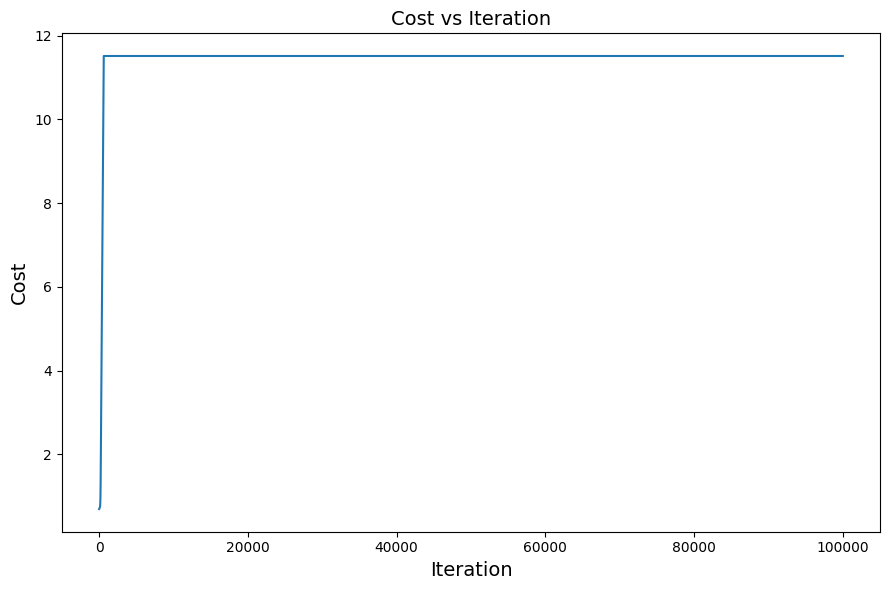

In [50]:
import matplotlib.pyplot as plt
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

#**6. Decision/Prediction Function for Binary Classification:**

**7. Task To Do:**

• Implement the prediction Function by completing the code or writing your own function.

• Make sure you pass the test case.

*Decision/Prediction Function:*

In [53]:
import numpy as np
def prediction(X, w, b, threshold=0.5):
  """
  Predicts binary outcomes for given input features based on logistic regression parameters.
  Arguments:
  X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d
  features.
  w (ndarray, shape (d,)): Array of weights learned via gradient descent.
  b (float): Bias learned via gradient descent.
  threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
  Returns:
  y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
  """
  z = np.dot(X, w) + b
  # Compute the predicted probabilities using the logistic function
  y_test_prob = logistic_function(z) # z = wx + b
  # Classify based on the threshold
  y_pred = (y_test_prob >= threshold).astype(int)
  return y_pred

*A simple assertion test for Prediction Function:*

In [54]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold = 0.5 # Default threshold
  # Updated expected output
  expected_output = np.array([0, 1, 1])
  # Call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()


Test passed!


#**7. Evaluating Classifier:**

**8. Task To Do:**

• Implement evaluate classification Function by completing the code or writing your own
function.

• Make sure you pass the test case.

*Evaluation of the Classifier:*

In [55]:
def evaluate_classification(y_true, y_pred):
  """
  Computes the confusion matrix, precision, recall, and F1-score for binary classification.
  Arguments:
  y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
  y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
  Returns:
  metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
  """
  # Initialize confusion matrix components
  TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
  TN = np.sum((y_true == 0) & (y_pred == 0)) # True Negatives
  FP = np.sum((y_true == 0) & (y_pred == 1)) # False Positives
  FN = np.sum((y_true == 1) & (y_pred == 0))
  # Confusion matrix
  confusion_matrix = np.array([[TN, FP],[FN, TP]])
  # Precision, recall, and F1-score
  precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0.0 else 0.0
  # Metrics dictionary
  metrics = {
    "confusion_matrix": confusion_matrix,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score
  }
  return metrics